# Chapter 6. Probability

In [83]:
from __future__ import division
from collections import Counter
import math, random
from matplotlib import pyplot as plt

For our purposes you should think of probability as a way of quantifying the uncertainty associated with particular events chosen from some universe of events.  
For example, when you roll a die there is a probability associated with rolling a 3 or rolling an even number, and those are particular events.  
The universe of events are all possible outcomes (1-6) of rolling that die.

## Dependence and Independence

Roughly speaking, we say that two events E and F are dependent if knowing something about whether E happens gives us information about whether F happens (or vice versa).  
Otherwise, E and F are independent.  

Mathematically, we say that two events E and F are independent if the probability that they both happen is the product of the probability that each one happens:

$P(E,F) = P(E)P(F)$

## Conditional Probability

If E and F are not necessarily independent (and if the probability of F is not zero), then we define the probability of E "conditional on F" as:

$P(E|F) = P(E,F)|P(F)$  

You should think of this as the probability that E happens, given that we know that F happens.
This can be rewritten as:  

$P(E,F) = P(E|F)P(F)$  

When E and F are independent, you can check that this gives:  

$P(E|F) = P(E)$  

which is the mathematical way of expressing that knowing F occurred gives us no additional information about whether E occurred.


One common tricky example involves a family with two (unknown) children.  
If we assume that:  
- Each child is equally likely to be a boy or a girl
- The gender of the second child is independent of the gender of the first child  

then the event “no girls” has probability 1/4, the event “one girl, one boy” has probability 1/2, and the event “two girls” has probability 1/4.  
Now we can ask what is the probability of the event “both children are girls” (B) conditional on the event “the older child is a girl” (G)?  
Using the definition of conditional probability:  

$P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/2$

since the event B and G (“both children are girls and the older child is a girl”) is just the event B.  
(Once you know that both children are girls, it’s necessarily true that the older child is a girl.)  
Most likely this result accords with your intuition.  
We could also ask about the probability of the event “both children are girls” conditional on the event “at least one of the children is a girl” (L).   
Surprisingly, the answer is different from before!  
As before, the event B and L (“both children are girls and at least one of the children is a girl”) is just the event B.  
This means we have:  

$P(B|L) = P(B,L)/P(L) = P(B)/P(L) = 1/3$

How can this be the case?  
Well, if all you know is that at least one of the children is a girl, then it is twice as likely that the family has one boy and one girl than that it has both girls.  
We can check this by “generating” a lot of families:
 

In [84]:
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print "Probability that both children are girls and \
the older child is a girl -- P(both | older): ", both_girls / older_girl
print "Probability that both children are girls and \
at least one of the children is a girl -- P(both | either): ", both_girls / either_girl

Probability that both children are girls and the older child is a girl -- P(both | older):  0.514228456914
Probability that both children are girls and at least one of the children is a girl -- P(both | either):  0.341541328364


## [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes'_theorem)

Bayes’ theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

Bayes' theorem is stated mathematically as the following equation:  

${\large\displaystyle P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}}$  

where A and B are events and P(B) ≠ 0.

## Random Variables

A random variable is a variable whose possible values have an associated probability distribution.  
The associated distribution gives the probabilities that the variable realizes each of its possible values.  
For example, a coin flip variable equals 0 (tails) with probability 0.5 and 1 (heads) with probability 0.5.  

The expected value of a random variable is the average of its values weighted by their probabilities.  
Random variables can also be conditioned on events, like the previous example with the number of girls conditional on at least one of the children being a girl.  

## Continuous Distributions

A coin flip corresponds to a discrete distribution; one that associates positive probability with discrete outcomes.  
Often we will want to model distributions across a continuum of outcomes.  
Here comes the integral calculus:

The [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous%29) puts equal weight on all of the numbers between 0 an 1.  
Because there are infinitely many numbers between 0 and 1, this means that the weight it assigns to individual points must necessarily be zero.  
For this reason, we represent a continuous distribution with a [probability density function (pdf)](https://en.wikipedia.org/wiki/Probability_density_function) such that the probability of seeing a value in a certain interval equals the integral of the density function over the interval.  


In [85]:
# The density function for the uniform distribution:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

uniform_pdf(0.8)

## Python's random.random() is a pseudorandom variable with a uniform distribution.

1

Now let's plot the uniform probability density function:

In [86]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 /2 / sigma ** 2) / (sqrt_two_pi * sigma))

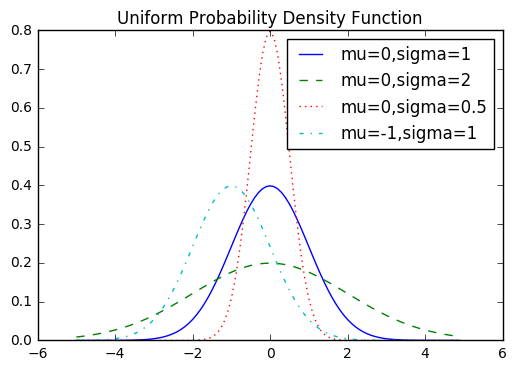

In [87]:
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=1)
    plt.title("Uniform Probability Density Function")
    plt.show()
    
plot_normal_pdfs(plt)

We will often be more interested in the [cumulative distribution function (cdf)](https://en.wikipedia.org/wiki/Cumulative_distribution_function), which gives the probability that a random variable is less than or equal to a certain value.  
Let's create the cumulative distribution function for the uniform distribution:  

In [88]:
def uniform_cdf(x):
    """ returns the probability that a uniform random variable is <= x """
    if x < 0:
        return 0  # uniform random is never less than 0 
    elif x < 1:
        return x  # e.g. P(X <= 0.4) = 0.4 
    else:
        return 1  # uniform random is always less than 1

## [The Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
### More information about the [Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html).  
### Yeah, it's important.

The normal distribution is the king of distributions.  
It is the classic bell-curve-shaped distribution and is completely determined by two parameters:
- mean or mu ${\mu}$
- standard deviation or sigma ${\sigma}$  

The mean indicates where the bell is centered, and the standard deviation dictates how wide the bell is.  

It has the distribution function:  

${\Huge\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\sigma ^{2}\pi }}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$  

which we can implement as:

In [89]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

Now to plot some of these probability distribution functions to see what they look like:

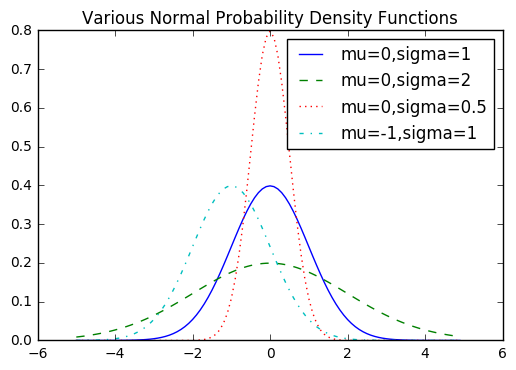

In [90]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal Probability Density Functions")
plt.show()

Pay attention, there's some more math coming your way.  

When ${\mu}$ = 0 and ${\sigma}$ = 1, it is called the standard normal distribution.  
If Z is a standard normal random variable, then it turns out that:  

${\large\displaystyle X = {\sigma}Z + {\mu}}$  

is also normal but with mean ${\mu}$ and standard deviation ${\sigma}$.  

Conversely, if X is a normal random variable with mean ${\mu}$ and standard deviation ${\sigma}$,  

${\large\displaystyle Z = (X - {\mu}) / {\sigma}}$  

is a standard normal variable.

The cumulative distribution function for the normal distribution cannot be written in an 'elementary' manner, but we can write it using Python's math.erf: 

In [91]:
# math.erf(x) -- Return the error function at x.
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

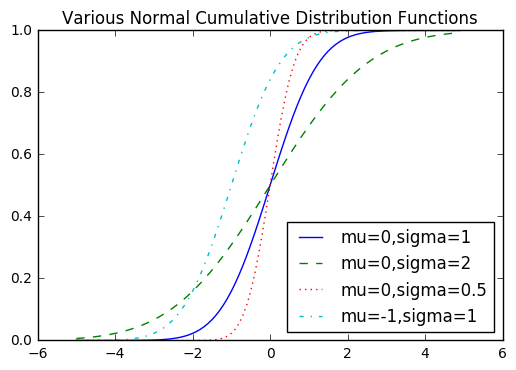

In [92]:
# Time to plot a few cumulative distibution functions
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal Cumulative Distribution Functions")
plt.show()

Sometimes we will need to invert <code>normal_cdf</code> to find the value corresponding to a specified probability.  
There's no simple way to compute its inverse, but <code>normal_cdf</code> is continuous and strictly increasing, so we can use a [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm).

In [93]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """ find approximate inverse using binary search """
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0  # normal_cdf(-10) very closely approximates 0
    hi_z, hi_p = 10.0, 1     # normal_cdf(10) very closely approximates 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2  # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

The function repeatedly bisects intervals until it narrows in on a Z that's close enough to the desired probability.  
Below are plots of various inverse-normal cdfs.

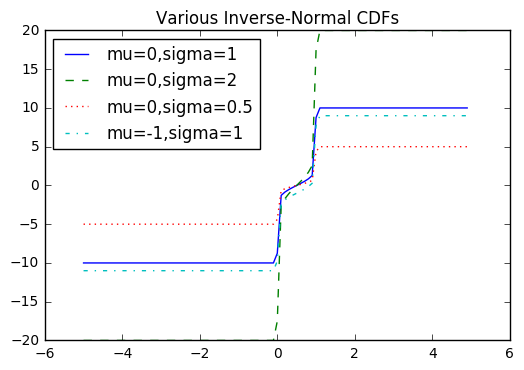

In [94]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[inverse_normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[inverse_normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[inverse_normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[inverse_normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=0) # top left
plt.title("Various Inverse-Normal CDFs")
plt.show()

## The Central Limit Theorem

The [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) basically states that a random variable defined as the average of a large number of independent and identically distributed random variables is itself approximately normally distributed.  
See, I told you the [normal distribution](http://stattrek.com/probability-distributions/normal.aspx) was important.

In particular, if $x_1, x_2, ... , x_n$ are random variables with mean ${\mu}$ and standard deviation ${\sigma}$, and if <code>n</code>, then:  

${\large\displaystyle {\frac {x_{1}+\cdots +x_{n}}{n}}}$

is approximately normally distributed with mean ${\mu}$ and standard deviation ${\sigma / \sqrt{n}}$.  

Equivalently (but often more usefully):

${\large\displaystyle {\frac {(x_{1}+\cdots +x_{n)} - {\mu}{n}}{\sigma \sqrt{n}}}}$  

is approximately normally distributed with mean 0 and standard deviation 1.

An easy (???) way to illustrate this is by looking at <em>binomial</em> random variables, which have two parameters <code>n</code> and <code>p</code>.  
A Binomial(n,p) random variable is simply the sum of <code>n</code> independent [Bernoulli(p)](https://en.wikipedia.org/wiki/Bernoulli_distribution) random variables, each of which equals 1 with probability <code>p</code> and 0 with probability <code>1-p</code>:

In [95]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is <code>p</code>, and its standard deviation is ${\sqrt{p(1 - p)}}$.  
The Central Limit Theorem states that as <code>n</code> gets large, a Binomial(n,p) variable is approximately a normal random variable with mean ${\mu} = np$ and standard deviation ${\sigma} = {\sqrt{np(1 - p)}}$.  
If we plot both, we can see the resemblance:  

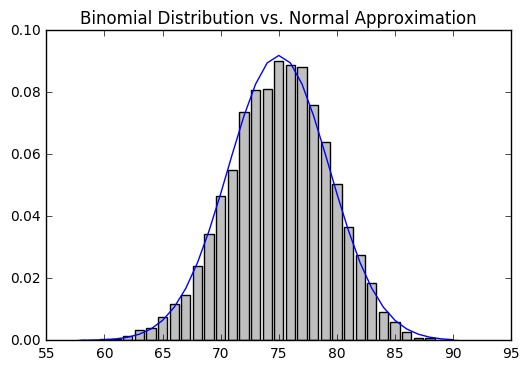

In [96]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75') 
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    # xs = Binomial Distribution = histogram
    # ys = Normal Approximation = blue line
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

# 0 < make_hist(p) < 1 
make_hist(0.75, 100, 10000)

In summary, if you want to know the probability that a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the probability that a Normal(50,5) is greater than 60, which is easier than computing the Binomial(100,0.5) cdf.  
This section, and indeed, this whole chapter, should give you incentive enough to learn statistical software and libraries that will execute these computations for you, but it is important to understand the underlying concepts.

## For Further Exploration

- [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) contains pdf and cdf functions for many common probability distributions.  
- [Introduction to Probability](https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)